In [2]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (16, 10)
pd.set_option('display.max_rows', 500)
import plotly.graph_objects as go

In [3]:
# try to parse the dates right at the beginning 
# it works out of the box if the date was stored ISO YYYY-MM-DD format

df_analyse=pd.read_csv('../data/processed/COVID_small_sync_timeline_table.csv',sep=';')  

df_analyse.sort_values('date',ascending=True).head()

,doubling every day,doubling every two days,doubling every 4 days,doubling every 10 days,"Korea, South",US,Italy,Spain,Germany,date
0,100.0,100.000000,100.000000,100.000000,204.0,174.0,155.0,165.0,159.0,0
1,200.0,141.421356,118.920712,107.177346,433.0,222.0,229.0,222.0,196.0,1
2,400.0,200.000000,141.421356,114.869835,602.0,337.0,322.0,259.0,262.0,2
3,800.0,282.842712,168.179283,123.114441,833.0,451.0,453.0,400.0,482.0,3
4,1600.0,400.000000,200.000000,131.950791,977.0,519.0,655.0,500.0,670.0,4


In [4]:
country_list=df_analyse.columns[1:]

In [5]:
df_analyse.head()

,doubling every day,doubling every two days,doubling every 4 days,doubling every 10 days,"Korea, South",US,Italy,Spain,Germany,date
0,100.0,100.000000,100.000000,100.000000,204.0,174.0,155.0,165.0,159.0,0
1,200.0,141.421356,118.920712,107.177346,433.0,222.0,229.0,222.0,196.0,1
2,400.0,200.000000,141.421356,114.869835,602.0,337.0,322.0,259.0,262.0,2
3,800.0,282.842712,168.179283,123.114441,833.0,451.0,453.0,400.0,482.0,3
4,1600.0,400.000000,200.000000,131.950791,977.0,519.0,655.0,500.0,670.0,4


# Helper Functions

In [6]:
def quick_plot(x_in, df, y_scale = 'log', slider = False, xname = ' ', yname = ' ', figname = ' '):
    """ Quick basic plot for quick static evaluation of a time series
    
        you can push selective columns of your data frame by .iloc[:,[0,6,7,8]]
        
        Parameters:
        ----------
        x_in : array 
            array of date time object, or array of numbers
        df_input : pandas dataframe 
            the plotting matrix where each column is plotted
            the name of the column will be used for the legend
        scale: str
            y-axis scale as 'log' or 'linear'
        slider: bool
            True or False for x-axis slider
        xname : str
            Title of the X axis
        yname : str
            Title of the Y axis
        figname : str
            Title of the figure
        
        Returns:
        ----------
        Return type: Figure
    
    """    
    fig = go.Figure()
    for each in df.columns:
        fig.add_trace(go.Scatter(x=x_in, 
                                 y=df[each], 
                                 name= each,
                                 mode= 'markers+lines',
                                 line_width = 1,
                                 marker_size = 3)
                     )
    fig.update_layout(xaxis_title = xname,
                      yaxis_title = yname,
                      width = 1000, 
                      height = 800,
                      title={
                        'text': figname,
                        'y':0.9,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'}
                    )
    fig.update_yaxes(type = y_scale)
    fig.update_xaxes(tickangle=-45,
                 nticks=20,
                 tickfont=dict(size=14,color="#7f7f7f")
                )    
    if slider==True:
        fig.update_layout(xaxis_rangeslider_visible=True)
    fig.show()

In [7]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Fitting a polynomail curve

### Highly recommended section: Hyperparameters and Model Validation from Jake VanderPlas

This function is from the Python Data Science Handbook by Jake VanderPlas; the content is available on GitHub.

https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html#sphx-glr-auto-examples-linear-model-plot-polynomial-interpolation-py

In [8]:
# check that all data are there
df_poly_check=df_analyse.iloc[0:27,4:-1].reset_index()
df_poly_check.head()

,index,"Korea, South",US,Italy,Spain,Germany
0,0,204.0,174.0,155.0,165.0,159.0
1,1,433.0,222.0,229.0,222.0,196.0
2,2,602.0,337.0,322.0,259.0,262.0
3,3,833.0,451.0,453.0,400.0,482.0
4,4,977.0,519.0,655.0,500.0,670.0


In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [10]:
y=df_poly_check[['Germany','Italy','US','Spain', 'Korea, South']]

In [11]:
y.head()

,Germany,Italy,US,Spain,"Korea, South"
0,159.0,155.0,174.0,165.0,204.0
1,196.0,229.0,222.0,222.0,433.0
2,262.0,322.0,337.0,259.0,602.0
3,482.0,453.0,451.0,400.0,833.0
4,670.0,655.0,519.0,500.0,977.0


In [12]:
y=df_poly_check[['Germany','Italy','US','Spain', 'Korea, South']].unstack()

In [13]:
y

Germany       0        159.0
              1        196.0
              2        262.0
              3        482.0
              4        670.0
              5        799.0
              6       1040.0
              7       1176.0
              8       1457.0
              9       1908.0
              10      2078.0
              11      3675.0
              12      4585.0
              13      5795.0
              14      7272.0
              15      9257.0
              16     12327.0
              17     15320.0
              18     19848.0
              19     22213.0
              20     24873.0
              21     29056.0
              22     32986.0
              23     37323.0
              24     43938.0
              25     50871.0
              26     57695.0
Italy         0        155.0
              1        229.0
              2        322.0
              3        453.0
              4        655.0
              5        888.0
              6       1128.0
              

In [14]:
y=df_poly_check[['Germany','Italy','US','Spain', 'Korea, South']].unstack().sort_index(axis=0,level=1)

In [15]:
y.tail()

Germany       26     57695.0
Italy         26     47021.0
US            26    188724.0
Spain         26     80110.0
Korea, South  26      8413.0
dtype: float64

In [16]:
# Prepare train and test data
test_points = 28
y_train = y[0:-test_points-1]
y_test = y[-test_points:]
X_train = np.arange(len(y_train)).reshape(-1,1)/5.0
X_test = np.arange(len(y_train),len(y_train)+test_points).reshape(-1,1)/5.0

In [17]:
import seaborn
seaborn.set(rc={'figure.figsize':(16,8)})  # plot formatting, prepare for subplot

In [18]:
def PolynomialRegression(degree = 2, **kwarg):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwarg))

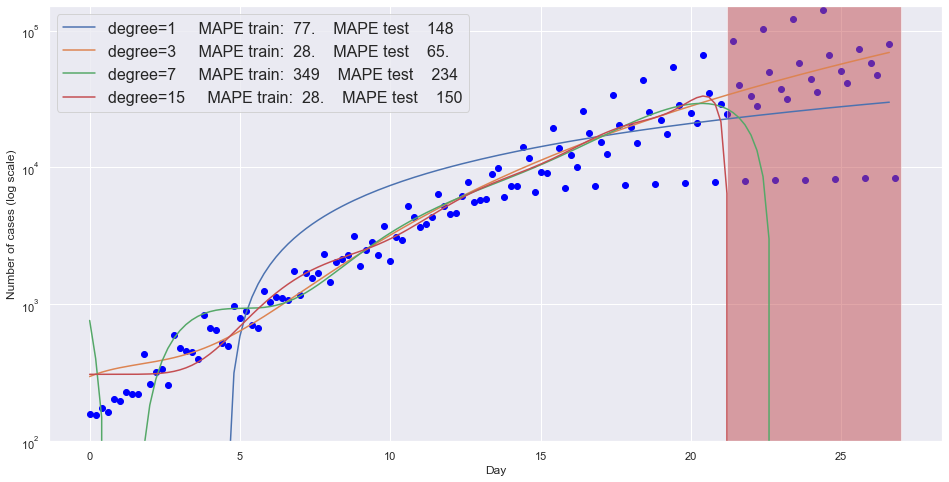

In [19]:
fig, ax = plt.subplots(1,1)
ax.scatter(np.arange(len(y))/5, y, color = 'blue') 
ax.axvspan((len(y)-test_points-1)/5, len(y)/5, facecolor='r', alpha=0.5)
ax.set_xlabel("Day")
ax.set_ylabel("Number of cases (log scale)")

for degree in [1,3,7,15]:
    y_hat_insample = PolynomialRegression(degree).fit(X_train, y_train).predict(X_train)
    y_hat_test = PolynomialRegression(degree).fit(X_train, y_train).predict(X_test)
    X_plot=np.concatenate((X_train, X_test), axis=None)
    y_plot=np.concatenate((y_hat_insample, y_hat_test), axis=None)
    
    ax.plot(X_plot, y_plot, label='degree={0}'.format(degree)+ 
                 '     MAPE train:  ' + str(mean_absolute_percentage_error(y_hat_insample, y_train))[0:3]
                 +'    MAPE test    ' +str(mean_absolute_percentage_error(y_hat_test, y_test))[0:3])
ax.set_ylim(100, 150000)
ax.set_yscale('log')
ax.legend(loc='best',
           prop={'size': 16});

# Regression Metrics (source wikipedia)

## Mean Absolute Error

In statistics, mean absolute error MAE''' is a measure of Errors between paired observations expressing the same phenomenon.

Comparing examples of ''Y'' (forecasts) versus ''X'' (actual/observe) across time steps MAE is calculated as:

$\mathrm{MAE} = \frac{\sum_{i=1}^n\left| y_i-x_i\right|}{n} =\frac{\sum_{i=1}^n\left| e_i \right|}{n}.$

## Mean Absolute Percentage Error (MAPE)

mean absolute percentage error (MAPE), also known as mean absolute percentage deviation (MAPD), is a measure of prediction accuracy of a forecasting method in [[statistics]],

for example in trend estimation, also used as a loss function for regression problems in machine learning. It usually expresses the accuracy as a ratio defined by the formula:

$\mbox{MAPE} = \frac{1}{n}\sum_{i=1}^n  \left|\frac{x_i-y_i}{x_i}\right| $

### if the MAPE is 80, on average, the forecast is off by 80%

In [20]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Symmetric mean absolute percentage error

Symmetric mean absolute percentage error (SMAPE''' or '''sMAPE)''' is an accuracy measure based on percentage (or relative) errors. It is usually defined{{Citation needed|reason=S. Makridakis didn't use following definition in his article ''Accuracy measures: theoretical and practical concerns,'' 1993.|date=May 2017}} as follows:

$ \text{SMAPE} = \frac{100\%}{n} \sum_{t=1}^n \frac{\left|F_t-A_t\right|}{(|A_t|+|F_t|)/2}$